In [1]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
import cv2

In [4]:
img=cv2.imread('../passport/Indonesia.jpg')
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
text=pytesseract.image_to_string(img)
print(text)

: wet oe eee SPE e EWEN

PASPOR JENIS / TYPE KODE NEGARA / COUNTRY CODE i en tf oe a ‘
PASSPORT Pp IDN XO 0) 0 0 0 0
NAMA. LENGKAP?7 FULL NAME KELAMIN / SEX
NAMA LENGKAP : K/S
KEWARGANEGARAAN NATIONALITY.
INDONESIA. -
: GL EAHIR EDATE oF BIRTH : a : * TEMPAT LAHIR/ PLACE OF BIRTH
1LAUG 19045” ee JAKARTA
TGL, PENGELUARANT DATE OF issue, ane TGL.HABIS BERUAKU / DATE OF EXPIRY
26 JAN 2011, i 26 JAN 2016
REG:WO TA SOR MANE panera
QAaaaa 000000000000 9A00B00000-xYZ KANTOR IMIGRASI

P<IDNLENGKAP<<NAMA<<<<<<<K<<<<s<sssssssssss<<
X000000<<9IDN4508179S1601269<<<<<<<<<<s<<<9



In [6]:
import cv2
import pytesseract
import json
from pytesseract import Output

# Function to perform OCR on an image
def perform_ocr(image_path):
    # Read image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR using Tesseract
    d = pytesseract.image_to_data(gray_image, output_type=Output.DICT)
    
    # Extract recognized text and bounding boxes
    n_boxes = len(d['text'])
    ocr_results = []
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:  # Consider text only if confidence is above 60
            text = d['text'][i]
            x, y, w, h = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
            ocr_results.append({
                "text": text,
                "bounding_box": [x, y, w, h]
            })
    
    return ocr_results

# Function to process multiple images and save results to a JSON file
def process_images(image_paths, output_file):
    results = {}
    for image_path in image_paths:
        ocr_results = perform_ocr(image_path)
        results[image_path] = ocr_results
    
    # Save results to a JSON file
    with open(output_file, 'w') as outfile:
        json.dump(results, outfile, indent=4)

# List of image paths
image_paths = [
    '../passport/Canada.jpg',
    '../passport/Iceland.jpg',
    '../passport/India.jpg',
    '../passport/Indonesia.jpg',
    '../passport/Kyrgyzstan.jpg'
]

# Output JSON file
output_file = 'ocr_results.json'

# Process images
process_images(image_paths, output_file)


In [7]:
import cv2
import pytesseract
import json
from pytesseract import Output

# Function to perform OCR on an image
def perform_ocr(image_path):
    # Read image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR using Tesseract
    d = pytesseract.image_to_data(gray_image, output_type=Output.DICT)
    
    # Extract recognized text and bounding boxes
    n_boxes = len(d['text'])
    ocr_results = []
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:  # Consider text only if confidence is above 60
            text = d['text'][i]
            x, y, w, h = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
            ocr_results.append({
                "text": text,
                "bounding_box": [x, y, w, h]
            })
            # Draw bounding box on the image
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return ocr_results, image

# Function to process multiple images and save results to a JSON file
def process_images(image_paths, output_file):
    results = {}
    for image_path in image_paths:
        ocr_results, annotated_image = perform_ocr(image_path)
        results[image_path] = ocr_results
        # Save the image with bounding boxes
        output_image_path = image_path.replace('.jpg', '_annotated.jpg')
        cv2.imwrite(output_image_path, annotated_image)
    
    # Save results to a JSON file
    with open(output_file, 'w') as outfile:
        json.dump(results, outfile, indent=4)

# List of image paths
image_paths = [
    '../passport/Canada.jpg',
    '../passport/Iceland.jpg',
    '../passport/India.jpg',
    '../passport/Indonesia.jpg',
    '../passport/Kyrgyzstan.jpg'
]

# Output JSON file
output_file = 'ocr_results.json'

# Process images
process_images(image_paths, output_file)


In [8]:
import cv2
import pytesseract
import json
from pytesseract import Output

# Function to perform OCR on an image
def perform_ocr(image_path):
    # Read image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform OCR using Tesseract
    d = pytesseract.image_to_data(gray_image, output_type=Output.DICT)
    
    # Extract recognized text and bounding boxes
    n_boxes = len(d['text'])
    ocr_results = []
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:  # Consider text only if confidence is above 60
            text = d['text'][i]
            x, y, w, h = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
            ocr_results.append({
                "text": text,
                "bounding_box": [x, y, w, h]
            })
            # Draw bounding box on the image
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # Put text on the image
            image = cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    
    return ocr_results, image

# Function to process multiple images and save results to a JSON file
def process_images(image_paths, output_file):
    results = {}
    for image_path in image_paths:
        ocr_results, annotated_image = perform_ocr(image_path)
        results[image_path] = ocr_results
        # Save the image with bounding boxes and text
        output_image_path = image_path.replace('.jpg', '_annotated.jpg')
        cv2.imwrite(output_image_path, annotated_image)
    
    # Save results to a JSON file
    with open(output_file, 'w') as outfile:
        json.dump(results, outfile, indent=4)

# List of image paths
image_paths = [
    '../passport/Canada.jpg',
    '../passport/Iceland.jpg',
    '../passport/India.jpg',
    '../passport/Indonesia.jpg',
    '../passport/Kyrgyzstan.jpg'
]

# Output JSON file
output_file = 'ocr_results.json'

# Process images
process_images(image_paths, output_file)


In [41]:
import cv2
import pytesseract
import json
from pytesseract import Output
import numpy as np

# Function to perform OCR on an image

def perform_ocr(image_path):
    # Read image using OpenCV
    image = cv2.imread(image_path)
    
   
    # Pre-process the image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.medianBlur(gray_image, 3)  # Remove noise
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Binarization
    
    # Perform OCR using Tesseract with custom configuration
    custom_config = r'--oem 3 --psm 11'
    d = pytesseract.image_to_data(binary_image, config=custom_config, output_type=Output.DICT)
    
    # Extract recognized text and bounding boxes
    n_boxes = len(d['text'])
    ocr_results = []
    for i in range(n_boxes):
        if int(d['conf'][i]) > 50:  # Consider text only if confidence is above 60
            text = d['text'][i]
            x, y, w, h = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
            ocr_results.append({
                "text": text,
                "bounding_box": [x, y, w, h]
            })
            # Draw bounding box on the image
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # Put text on the image
            image = cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    
    return ocr_results, image

# Function to process multiple images and save results to a JSON file
def process_images(image_paths, output_file):
    results = {}
    for image_path in image_paths:
        ocr_results, annotated_image = perform_ocr(image_path)
        results[image_path] = ocr_results
        # Save the image with bounding boxes and text
        output_image_path = image_path.replace('.jpg', '_annotated.jpg')
        cv2.imwrite(output_image_path, annotated_image)
    
    # Save results to a JSON file
    with open(output_file, 'w') as outfile:
        json.dump(results, outfile, indent=4)

# List of image paths
image_paths = [
    '../passport/Canada.jpg',
    '../passport/Iceland.jpg',
    '../passport/India.jpg',
    '../passport/Indonesia.jpg',
    '../passport/Kyrgyzstan.jpg'
]

# Output JSON file
output_file = 'ocr_results.json'

# Process images
process_images(image_paths, output_file)


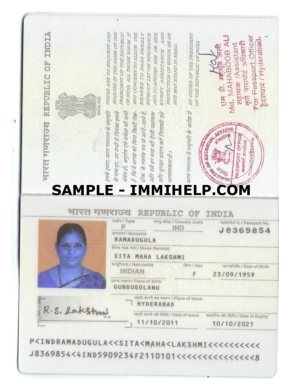

In [15]:
import matplotlib.pyplot as plt
img=cv2.imread('../passport/India.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

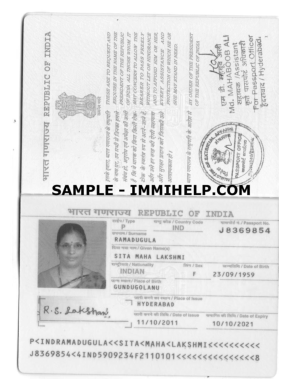

In [18]:
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg,cmap='gray')
plt.axis('off')
plt.show()


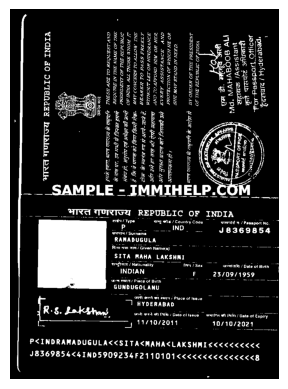

In [19]:
ret, thresh = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show()


In [26]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))



In [28]:
dilation = cv2.dilate(thresh, horizontal_kernel, iterations=1)


In [23]:
eroded = cv2.erode(thresh, horizontal_kernel, iterations=1)


In [24]:
horizontal_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


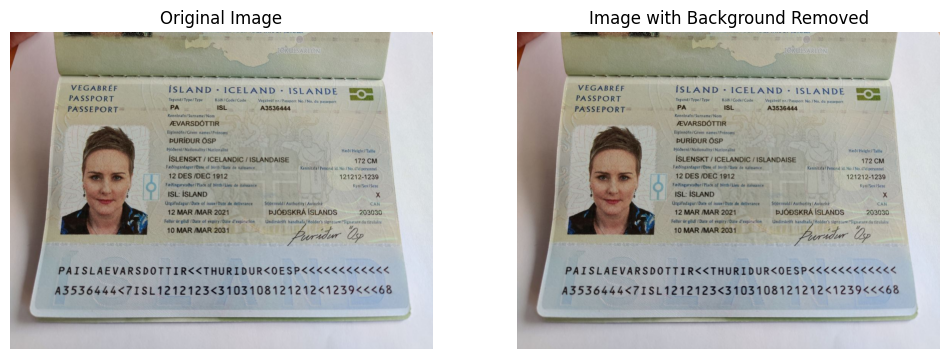

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '../passport/Iceland.jpg'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to get a mask
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the largest contour
mask = np.zeros_like(image)
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the mask to the image
result = cv2.bitwise_and(image, mask)

# Convert BGR to RGB for display with matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the original and the result image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Image with Background Removed')
plt.axis('off')

plt.show()


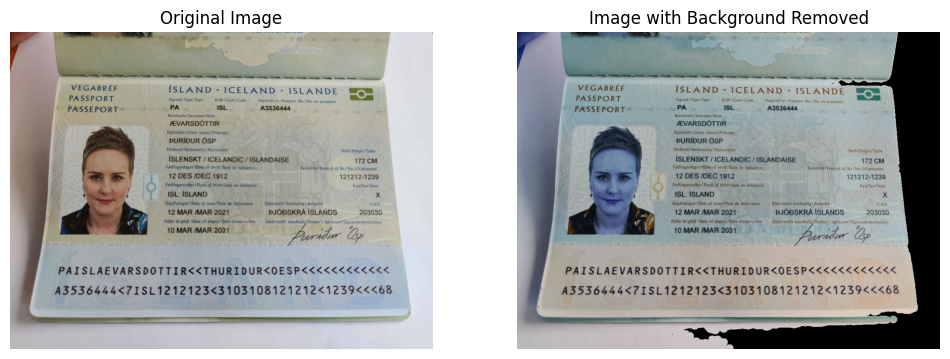

In [38]:
import cv2
import numpy as np

# Read image
img = cv2.imread('../passport/Iceland.jpg')
hh, ww = img.shape[:2]

# threshold on white
# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)


# # save results
# cv2.imwrite('pills_thresh.jpg', thresh)
# cv2.imwrite('pills_morph.jpg', morph)
# cv2.imwrite('pills_mask.jpg', mask)
# cv2.imwrite('pills_result.jpg', result)

# cv2.imshow('thresh', thresh)
# cv2.imshow('morph', morph)
# cv2.imshow('mask', mask)
# cv2.imshow('result', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Display the original and the result image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Image with Background Removed')
plt.axis('off')

plt.show()